In [24]:
import osmnx as ox
import networkx as nx

In [41]:
rc = ox.graph_from_point((24.4447, 54.7275))

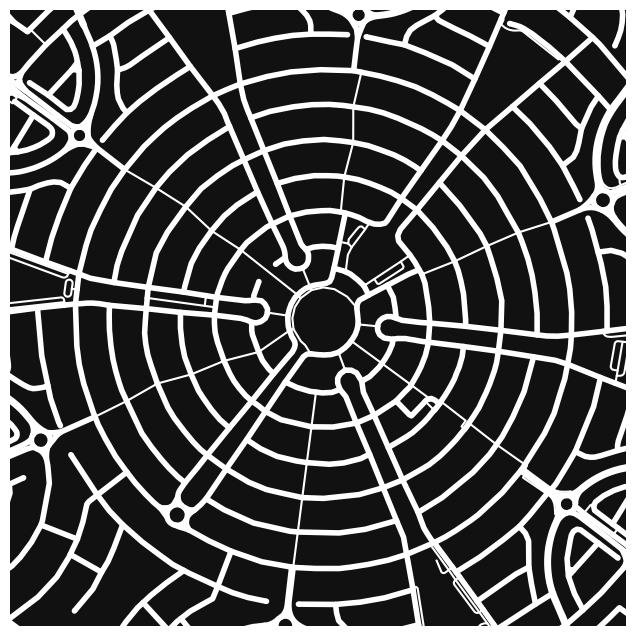

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [42]:
ox.plot.plot_figure_ground(rc)

In [16]:
G = ox.load_graphml("../data/processed/plan_paris/paris_multigraph.graphml")

In [21]:
H = ox.load_graphml(
    "../data/processed/plan_paris/paris_bikeplan_noattribute_multigraph.graphml"
)

In [36]:
G_deg = list(dict(nx.degree(G)).values())
H_deg = list(dict(nx.degree(H)).values())

In [29]:
import pandas as pd

In [37]:
len(G_deg)

110053

In [38]:
len(H_deg)

486

In [39]:
len(G_deg + H_deg)

110539

In [40]:
df = pd.DataFrame(G_deg + H_deg)
df["Network"] = ["Road Network"] * len(G_deg) + ["Bicycle Network"] * len(H_deg)

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

In [78]:
from collections import Counter

In [93]:
a = Counter(H_deg)

In [94]:
a[3]

214

In [96]:
len(H) - a[3] - a[4]

58

In [97]:
a[4]

214

In [87]:
a[3] / len(G_deg)

0.5637011258211952

In [88]:
a[4] / len(G_deg)

0.34301654657301484

(0.0, 7.5)

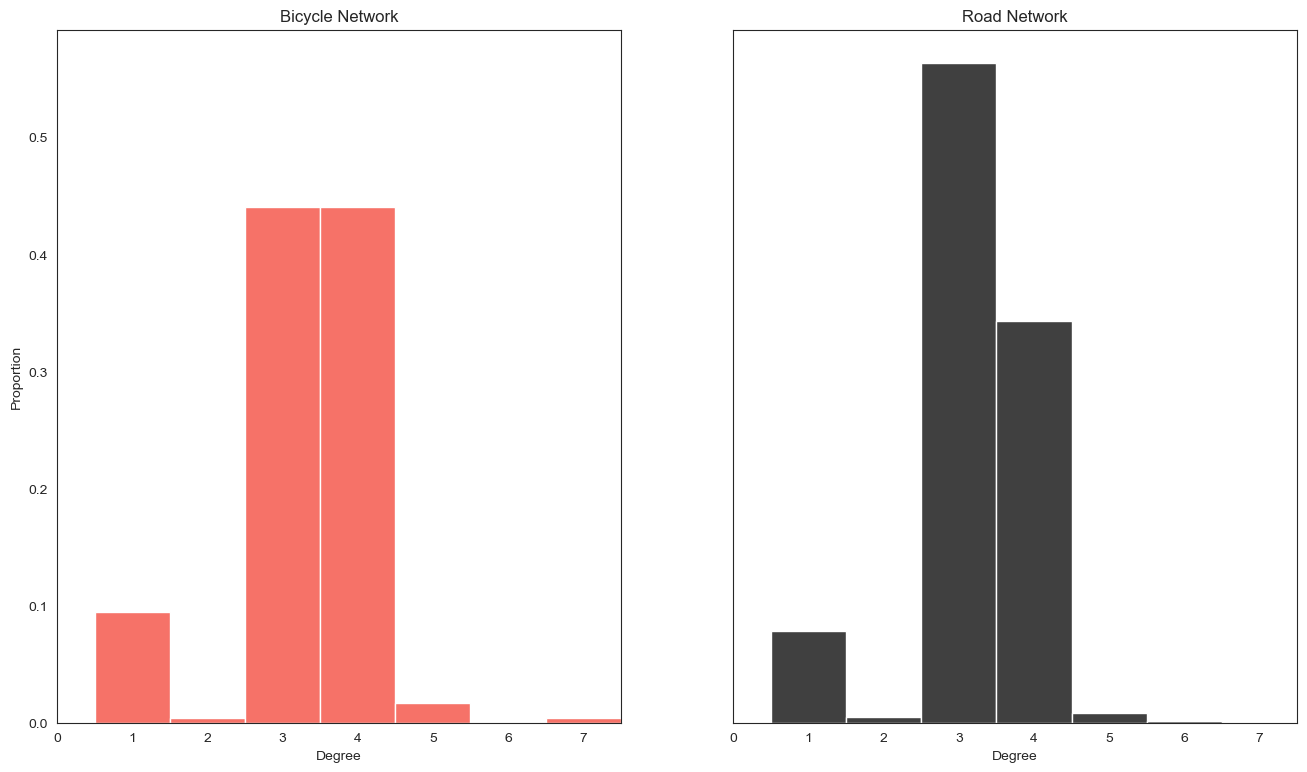

In [77]:
sns.set_style("white")
fig, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
sns.histplot(H_deg, stat="proportion", discrete=True, ax=ax[0], color="#f44336")
ax[0].set_title("Bicycle Network")
ax[0].set_xlabel("Degree")
ax[1].set_xlabel("Degree")
ax[1].set_title("Road Network")
sns.histplot(G_deg, stat="proportion", discrete=True, ax=ax[1], color="black")
ax[0].set_xlim(0, 7.5)
ax[1].set_xlim(0, 7.5)

In [362]:
# G = nx.edge_subgraph(G, [e for e in G.edges if G.edges[e]["attribute"] == "built"])

In [17]:
len(G)

110053

In [18]:
len(G.edges)

176226

In [365]:
nx.number_connected_components(G)

1

In [366]:
len([edge for edge in G.edges if G.edges[edge]["attribute"] == "built"])

279

In [367]:
len([edge for edge in G.edges if G.edges[edge]["attribute"] == "planned"])

345

In [368]:
import numpy as np

In [369]:
np.mean(list(dict(nx.degree(G)).values()))

3.515492957746479

In [370]:
min(list(dict(nx.degree(G)).values()))

2

In [371]:
max(list(dict(nx.degree(G)).values()))

8

In [103]:
length = [H.edges[e]["length"] for e in H.edges]

In [104]:
sum(length)

390045.4837515201

In [374]:
sum([G.edges[e]["length"] for e in G.edges if G.edges[e]["attribute"] == "planned"])

174065.14925090378

In [375]:
sum([G.edges[e]["length"] for e in G.edges if G.edges[e]["attribute"] == "built"])

143703.96918773855

In [100]:
import numpy as np

In [105]:
np.mean(length)

486.9481694775531

In [106]:
np.median(length)

412.11514624942384

In [378]:
min(length)

10.122063314499616

In [379]:
max(length)

1772.4910361663335

In [380]:
ox.save_graph_geopackage(
    G, "../data/processed/plan_paris/paris_bikeplan_pruned_multigraph.gpkg"
)

/Users/clse/miniforge3/envs/orderbike/lib/python3.12/site-packages/osmnx/utils_graph.py:513: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])
